##### Walk forward validation for ARIMA model

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\E\E_drive_copy\sample_data\ts_ud\Resources\Data + Code\shampoo.csv', parse_dates=[0])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [4]:
df.shape

(36, 2)

In [5]:
df

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [6]:
# P - number of terms to consider, D- number of differencing, Q - number of differencing for moving average

<AxesSubplot:xlabel='Month'>

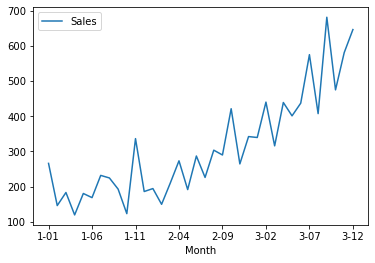

In [7]:
df.set_index('Month').plot()

In [8]:
# D = 2 (polynomial trend)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

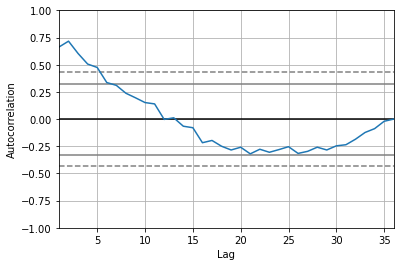

In [9]:
# autocorrelation

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])

In [10]:
# q = 5 (5 continuous seasons has a correlation of 0.5 plus)

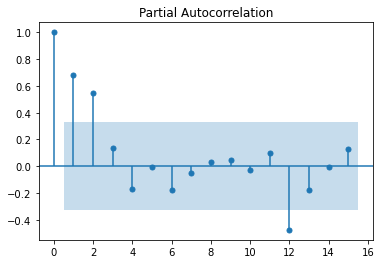

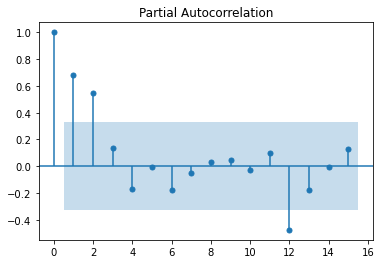

In [11]:
# partial autocorrelation

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Sales'], lags=15)

In [12]:
# p = 2 (correlation of 0.5 plus)

In [13]:
# from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.arima.model import ARIMA

In [14]:
arima_model = ARIMA(df['Sales'], order=(5,2,2)).fit()

C:\Users\sreer\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [15]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 2, 2)   Log Likelihood                -191.901
Date:                Sun, 10 Apr 2022   AIC                            399.801
Time:                        23:23:03   BIC                            412.012
Sample:                             0   HQIC                           403.966
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2741      3.066     -0.416      0.678      -7.283       4.735
ar.L2         -0.9934      3.912     -0.254      0.800      -8.661       6.674
ar.L3         -0.8128      2.923     -0.278      0.781      -6.542       4.917
ar.L4         -0.5075      2.312     -0.220      0.826      -5.038       4.023
ar.L5         -0.0803      1.328     -0.060      0.952      -2.684       2.523
ma.L1         -0.8519      3.156     -0.270      0.787      -7.037       5.333
ma.L2          0.0832      2.548      0.033      0.974      -4.910       5.077
sigma2      3996.2464   1308.562      3.054      0.002    1431.512    6560.981
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.72   Prob(JB):                         0.81
Heteroskedasticity (H):               0.94   Skew:                            -0.00
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
# p value can be used to check the importance of variables

In [17]:
residuel = arima_model.resid

<AxesSubplot:>

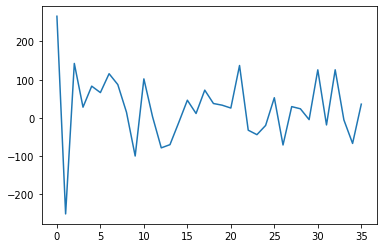

In [18]:
residuel.plot()

In [19]:
df.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [20]:
residuel.describe()

count     36.000000
mean      24.806049
std       88.931498
min     -251.238808
25%      -18.718285
50%       26.920283
75%       75.248611
max      266.000000
dtype: float64

In [21]:
# forecasting for next period

arima_model.forecast()


36    608.240309
dtype: float64

In [22]:
# forecasting next 5 values

forecast_5 = arima_model.forecast(5)

forecast_5

36    608.240309
37    700.069316
38    641.957562
39    725.401602
40    727.544083
Name: predicted_mean, dtype: float64

In [23]:
df2 = df.copy()

In [24]:
df2.head(2)

,Month,Sales
0,1-01,266.0
1,1-02,145.9


In [25]:
df2['Month'] = df2['Month'].apply(lambda x:x[2:] + '-200' + x[0])

df2.head(2)

,Month,Sales
0,01-2001,266.0
1,02-2001,145.9


In [26]:
df2['Month'] = pd.to_datetime(df2['Month'])

In [27]:
df2.head(2)

,Month,Sales
0,2001-01-01,266.0
1,2001-02-01,145.9


In [28]:
df2['Month'][-1:]

35   2003-12-01
Name: Month, dtype: datetime64[ns]

In [29]:
pd.date_range('2004-01-01', periods=5, freq='m')

DatetimeIndex(['2004-01-31', '2004-02-29', '2004-03-31', '2004-04-30',
               '2004-05-31'],
              dtype='datetime64[ns]', freq='M')

In [30]:
pred_df = pd.DataFrame({'Month':pd.date_range('2004-01-01', periods=5, freq='m'), 'Sales':[0,0,0,0,0], 'pred':forecast_5})

pred_df

,Month,Sales,pred
36,2004-01-31,0,608.240309
37,2004-02-29,0,700.069316
38,2004-03-31,0,641.957562
39,2004-04-30,0,725.401602
40,2004-05-31,0,727.544083


In [31]:
df2['pred'] = 0

In [32]:
df2

,Month,Sales,pred
0,2001-01-01,266.0,0
1,2001-02-01,145.9,0
2,2001-03-01,183.1,0
3,2001-04-01,119.3,0
4,2001-05-01,180.3,0
5,2001-06-01,168.5,0
6,2001-07-01,231.8,0
7,2001-08-01,224.5,0
8,2001-09-01,192.8,0
9,2001-10-01,122.9,0


In [33]:
pred_df_final = pd.concat([df2, pred_df], ignore_index=True)

pred_df_final

,Month,Sales,pred
0,2001-01-01,266.0,0.000000
1,2001-02-01,145.9,0.000000
2,2001-03-01,183.1,0.000000
3,2001-04-01,119.3,0.000000
4,2001-05-01,180.3,0.000000
5,2001-06-01,168.5,0.000000
6,2001-07-01,231.8,0.000000
7,2001-08-01,224.5,0.000000
8,2001-09-01,192.8,0.000000
9,2001-10-01,122.9,0.000000


In [34]:
import numpy as np
pred_df_final.replace(0, np.nan, inplace=True)

pred_df_final

,Month,Sales,pred
0,2001-01-01,266.0,NaN
1,2001-02-01,145.9,NaN
2,2001-03-01,183.1,NaN
3,2001-04-01,119.3,NaN
4,2001-05-01,180.3,NaN
5,2001-06-01,168.5,NaN
6,2001-07-01,231.8,NaN
7,2001-08-01,224.5,NaN
8,2001-09-01,192.8,NaN
9,2001-10-01,122.9,NaN


<AxesSubplot:xlabel='Month'>

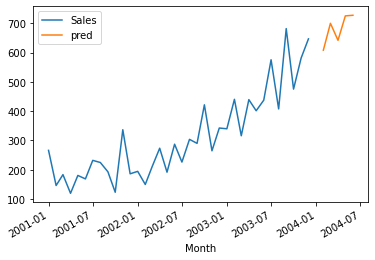

In [35]:
pred_df_final.set_index('Month').plot()

##### walk forward validation

In [36]:
df

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [37]:
train_size = int(df.shape[0] * 0.7)

In [38]:
train = df.Sales[:train_size]

test = df.Sales[train_size:]

In [39]:
train.shape

(25,)

In [40]:
test.shape

(11,)

In [41]:
from statsmodels.tsa.arima.model import ARIMA

In [48]:
data = train
predict =[]
for t in test:
    model = ARIMA(data, order=(5,2,2)).fit()
    y = model.forecast()
    print(float(y))
    predict.append(float(y))
    data = np.append(data, t)
    data = pd.Series(data)

410.6507655137434
376.5969163398747
403.62171523860104
373.077348178586
464.1237234952433


C:\Users\sreer\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


413.25949084205854


C:\Users\sreer\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


458.19888501686614
532.0681205455045
472.6741433785748


C:\Users\sreer\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


683.764922981088
594.5091065777631


In [49]:
predict

[410.6507655137434,
 376.5969163398747,
 403.62171523860104,
 373.077348178586,
 464.1237234952433,
 413.25949084205854,
 458.19888501686614,
 532.0681205455045,
 472.6741433785748,
 683.764922981088,
 594.5091065777631]

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [51]:
mean_absolute_error(test.values, predict)

63.756705232567356

In [52]:
mean_squared_error(test.values, predict)

6542.300710374432

In [53]:
(mean_squared_error(test.values, predict))**0.5

80.88448992467241

In [54]:
test

25    440.4
26    315.9
27    439.3
28    401.3
29    437.4
30    575.5
31    407.6
32    682.0
33    475.3
34    581.3
35    646.9
Name: Sales, dtype: float64

In [55]:
test.values

array([440.4, 315.9, 439.3, 401.3, 437.4, 575.5, 407.6, 682. , 475.3,
       581.3, 646.9])

In [56]:
df['Sales'].describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales, dtype: float64